## Project 3: Data Exploration of Prosper  Loan Data

### **_by Jarvis Rwabuyongo_**

***


## Introduction of the dataset

This data set contains 113,937 loans with 81 variables on each loan, including loan amount, borrower rate (or interest rate), current loan status, borrower income, and many others.

***


## Preliminary Wrangling

This document aims to explore this dataset

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [2]:
#Loading the dataset to be used in the project
df_loan = pd.read_csv('prosperLoanData.csv')

In [3]:
#Taking a visual assessment of the dataset
df_loan.head(5)

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20


In [4]:
df_loan.dtypes

ListingKey                      object
ListingNumber                    int64
ListingCreationDate             object
CreditGrade                     object
Term                             int64
                                ...   
PercentFunded                  float64
Recommendations                  int64
InvestmentFromFriendsCount       int64
InvestmentFromFriendsAmount    float64
Investors                        int64
Length: 81, dtype: object

In [5]:
df_loan['Investors']

0         258
1           1
2          41
3         158
4          20
         ... 
113932      1
113933     22
113934    119
113935    274
113936      1
Name: Investors, Length: 113937, dtype: int64

In [6]:
df_loan.columns

Index(['ListingKey', 'ListingNumber', 'ListingCreationDate', 'CreditGrade',
       'Term', 'LoanStatus', 'ClosedDate', 'BorrowerAPR', 'BorrowerRate',
       'LenderYield', 'EstimatedEffectiveYield', 'EstimatedLoss',
       'EstimatedReturn', 'ProsperRating (numeric)', 'ProsperRating (Alpha)',
       'ProsperScore', 'ListingCategory (numeric)', 'BorrowerState',
       'Occupation', 'EmploymentStatus', 'EmploymentStatusDuration',
       'IsBorrowerHomeowner', 'CurrentlyInGroup', 'GroupKey',
       'DateCreditPulled', 'CreditScoreRangeLower', 'CreditScoreRangeUpper',
       'FirstRecordedCreditLine', 'CurrentCreditLines', 'OpenCreditLines',
       'TotalCreditLinespast7years', 'OpenRevolvingAccounts',
       'OpenRevolvingMonthlyPayment', 'InquiriesLast6Months', 'TotalInquiries',
       'CurrentDelinquencies', 'AmountDelinquent', 'DelinquenciesLast7Years',
       'PublicRecordsLast10Years', 'PublicRecordsLast12Months',
       'RevolvingCreditBalance', 'BankcardUtilization',
       'Availa

In [7]:
df_loan.shape

(113937, 81)

In [8]:
#The statistics for numerical data
df_loan.describe()

,ListingNumber,Term,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperScore,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
count,1.139370e+05,113937.000000,113912.000000,113937.000000,113937.000000,84853.000000,84853.000000,84853.000000,84853.000000,84853.000000,...,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000
mean,6.278857e+05,40.830248,0.218828,0.192764,0.182701,0.168661,0.080306,0.096068,4.072243,5.950067,...,-54.725641,-14.242698,700.446342,681.420499,25.142686,0.998584,0.048027,0.023460,16.550751,80.475228
std,3.280762e+05,10.436212,0.080364,0.074818,0.074516,0.068467,0.046764,0.030403,1.673227,2.376501,...,60.675425,109.232758,2388.513831,2357.167068,275.657937,0.017919,0.332353,0.232412,294.545422,103.239020
min,4.000000e+00,12.000000,0.006530,0.000000,-0.010000,-0.182700,0.004900,-0.182700,1.000000,1.000000,...,-664.870000,-9274.750000,-94.200000,-954.550000,0.000000,0.700000,0.000000,0.000000,0.000000,1.000000
25%,4.009190e+05,36.000000,0.156290,0.134000,0.124200,0.115670,0.042400,0.074080,3.000000,4.000000,...,-73.180000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,2.000000
50%,6.005540e+05,36.000000,0.209760,0.184000,0.173000,0.161500,0.072400,0.091700,4.000000,6.000000,...,-34.440000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,44.000000
75%,8.926340e+05,36.000000,0.283810,0.250000,0.240000,0.224300,0.112000,0.116600,5.000000,8.000000,...,-13.920000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,115.000000
max,1.255725e+06,60.000000,0.512290,0.497500,0.492500,0.319900,0.366000,0.283700,7.000000,11.000000,...,32.060000,0.000000,25000.000000,25000.000000,21117.900000,1.012500,39.000000,33.000000,25000.000000,1189.000000


It looks like there are 61 numerical columns in this dataset

In [9]:
df_loan.shape

(113937, 81)

### What is the structure of your dataset?

This dataset contains 113937 rows of loan data with 81 columns

### What is/are the main feature(s) of interest in your dataset?

I am interested to see where most people with loans come from as well as their occupational and employment statuses, Which month of the year do most people borrow loans, the loan amounts and which term length do most applicants have

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

Well the columns EmploymentStatus, Occupation,LoanOriginationDate,BorrowerState, Term andLoanOriginalAmount will help me perform my investigation

## Univariate Exploration
First, let us find out the distribution of the amounts of loans originally requested

In [10]:
#This code is used to avoid repetitive code for labels and the titles
def xl_yl_t(xL,yL,title):
    plt.xlabel(xL)
    plt.ylabel(yL)
    plt.suptitle(title)
    

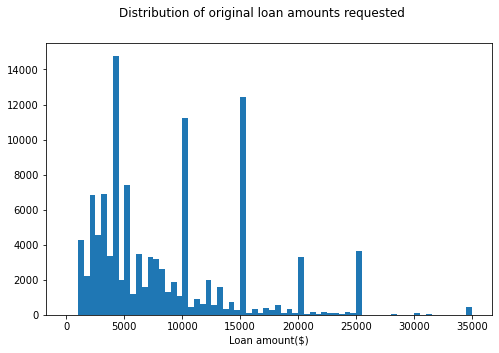

In [11]:
#Let us see the plot in a standard-scale plot
binsize = 500
bins = np.arange(0, df_loan['LoanOriginalAmount'].max()+binsize, binsize)
plt.figure(figsize=[8, 5])
plt.hist(data = df_loan, x = 'LoanOriginalAmount', bins = bins)
xl_yl_t('Loan amount($)','','Distribution of original loan amounts requested')
plt.show()

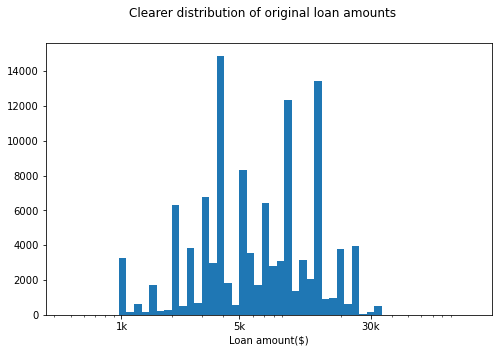

In [12]:
#Let us see a much more clear and meaningful plot of the visualization
log_binsize = 0.04
bins = 13 ** np.arange(2.4, np.log10(df_loan['LoanOriginalAmount'].max())+log_binsize, log_binsize)
plt.figure(figsize=[8, 5])
plt.hist(data = df_loan, x = 'LoanOriginalAmount', bins = bins)
plt.xscale('log')
plt.xticks([1e3,5e3,30e3], ['1k','5k','30k'])
xl_yl_t('Loan amount($)','','Clearer distribution of original loan amounts')
plt.show()

Well The visual can be clearly interpreted as generally more loans were between 1000 usd  and 5000 usd

Now let us try to find out which states did most loan borrowers come from, and which one did the least number of loan borrowers come from

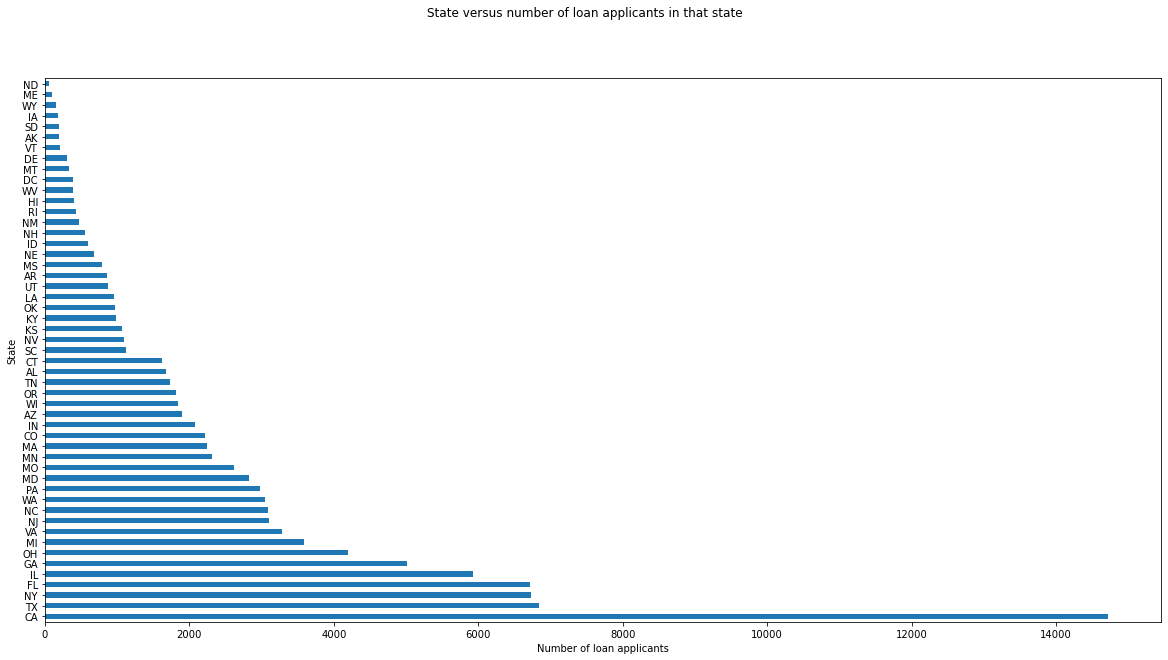

In [13]:
#code to plot horizontal bar chart
plt.figure(figsize=[20,10])
df_loan['BorrowerState'].value_counts().plot.barh()
xl_yl_t('Number of loan applicants','State','State versus number of loan applicants in that state')

From the plot above, it can clearly be seen that the state with the abbreviation CA had the most number of loan borrowers and ND had the least number of loan applicants.

Now, which time of the year do most loan applicants come from? we will need to do some wrangling to plot this data into a meaningful visualization to answer this question

In [14]:
df_loan.LoanOriginationDate

0         2007-09-12 00:00:00
1         2014-03-03 00:00:00
2         2007-01-17 00:00:00
3         2012-11-01 00:00:00
4         2013-09-20 00:00:00
                 ...         
113932    2013-04-22 00:00:00
113933    2011-11-07 00:00:00
113934    2013-12-23 00:00:00
113935    2011-11-21 00:00:00
113936    2014-01-21 00:00:00
Name: LoanOriginationDate, Length: 113937, dtype: object

In [15]:
#code to get months from the date column using string indexing techniques
month = df_loan.LoanOriginationDate.str[5:7]
month

0         09
1         03
2         01
3         11
4         09
          ..
113932    04
113933    11
113934    12
113935    11
113936    01
Name: LoanOriginationDate, Length: 113937, dtype: object

In [16]:
#Placing months as month names for better interpretation:
month = month.replace({'01':'January','02':'February','03':'March',
                  '04':'April','05':'May','06':'June',
                  '07':'July','08':'August','09':'September',
                  '10':'October','11':'November','12':'December'
                })

In [17]:
#combining the series month with the dataframe df_loan
d1 = df_loan.merge(month, left_index=True, right_index=True)
d1.head(2)

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors,LoanOriginationDate_y
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.158,0.138,...,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258,September
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.092,0.082,...,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1,March


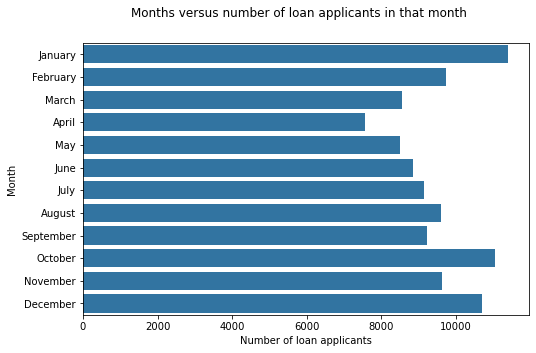

In [18]:
#code to plot the horizontal bar chart
plt.figure(figsize=[8,5])
color = sb.color_palette()[0]
sb.countplot(data = d1, y = 'LoanOriginationDate_y',color = color,order = ['January','February','March','April','May','June','July', 
                                                              'August','September','October','November',
                                                              'December'])
xl_yl_t('Number of loan applicants','Month','Months versus number of loan applicants in that month');

From the above plot it can clearly be seen that January has most number of loan applicants, it seems that most people borrow money at the start of the year

Let us also see which length of the loan most applicants had, so we can determine which time do most loan applicants prefer to have so they can be comfortable with working with the loan

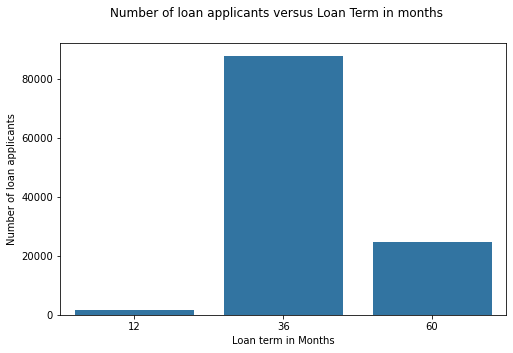

In [19]:
plt.figure(figsize=[8,5])
color = sb.color_palette()[0]
sb.countplot(data = df_loan, x = 'Term',color = color)
xl_yl_t('Loan term in Months','Number of loan applicants','Number of loan applicants versus Loan Term in months');

Generally we can see that most loan applicants had the loan term of 36 months (3 years), this is interesting as it clearly indicates that a loan applicant can be comfortable working with the loan, when the returning date is atleast 3 years

Now let us also try to see which income range has the most number of loan borrowers

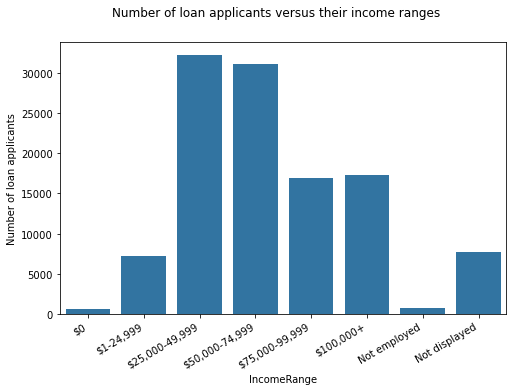

In [20]:
plt.figure(figsize=[8,5])
color = sb.color_palette()[0]
sb.countplot(data = df_loan, x = 'IncomeRange',color = color,order =["$0" ,"$1-24,999", "$25,000-49,999", "$50,000-74,999", "$75,000-99,999", "$100,000+","Not employed","Not displayed"])
plt.xticks(rotation=30, horizontalalignment="right");
xl_yl_t('IncomeRange','Number of loan applicants','Number of loan applicants versus their income ranges')

It can be clearly seen that the range $25,000 - 49,999 got most loans

Now let us see generally what is the employment status that most loan applicants have 

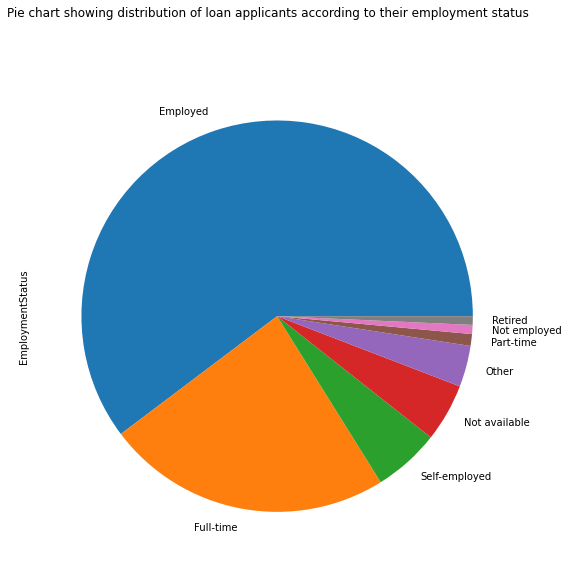

In [21]:
#code to plot the pie chart
plt.figure(figsize=[10,9])
df_loan['EmploymentStatus'].value_counts().plot.pie()
plt.suptitle('Pie chart showing distribution of loan applicants according to their employment status');

From the pie chart above, clearly we can see that most of the loan applicants were in some kind of employment

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

Most of the loan amount data was lying between 1000 usd and 20000usd, I used log transorm to make much more meaningful visualization

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

I had to change the date of the loans to see which months do many people apply for loans, to get the months and also to give a meaningful visualization

## Bivariate Exploration
First, let us see how the employment status and income range affects the amount of loans the people applied for

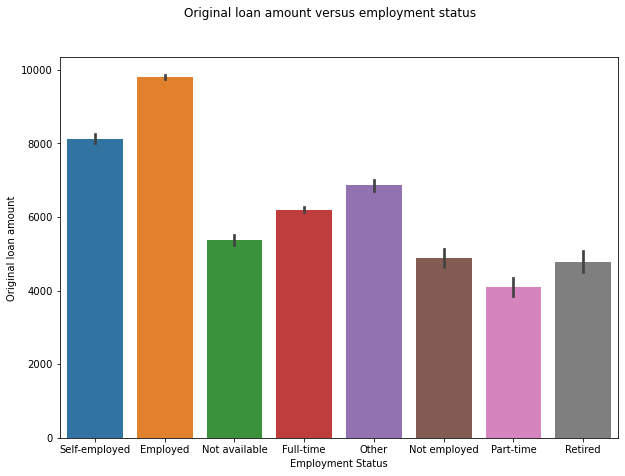

In [22]:
#This is a plot for loan amounts spread across various employment statuses
plt.figure(figsize=[10,7])
sb.barplot(y='LoanOriginalAmount', x='EmploymentStatus',  data=df_loan)
xl_yl_t('Employment Status','Original loan amount','Original loan amount versus employment status')

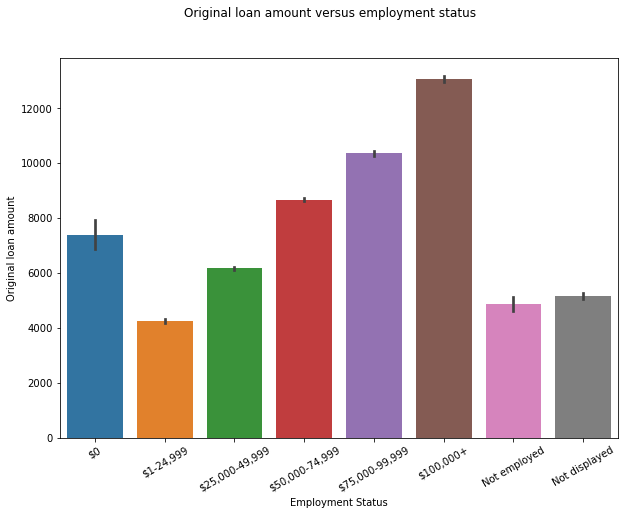

In [23]:
#This is a plot for loan amounts spread across various income ranges
plt.figure(figsize=[10,7])
sb.barplot(y='LoanOriginalAmount', x='IncomeRange', order =["$0" ,"$1-24,999", "$25,000-49,999", "$50,000-74,999", "$75,000-99,999", "$100,000+","Not employed","Not displayed"], data=df_loan)

xl_yl_t('Employment Status','Original loan amount','Original loan amount versus employment status')
plt.xticks(rotation=30, horizontalalignment="center");

From the two visualizations above, it is safe to say that The employed people generally apply for greater amounts of loan and also the people with the highest income range ($100,000+) applied for the highest amounts of loans

Here we will try too look at which month that most investors funded the loan

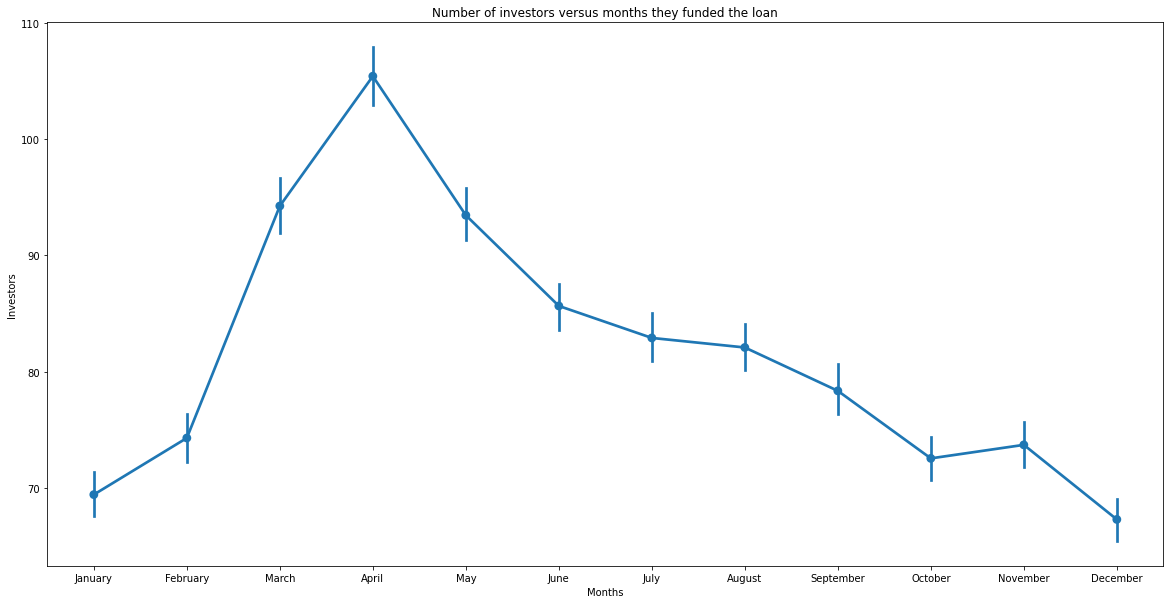

In [24]:
#code for plotting the point plot
plt.figure(figsize=[20,10])
plt.title('Number of investors versus months they funded the loan')
sb.pointplot(y='Investors', x='LoanOriginationDate_y', order=['January','February','March','April','May','June','July', 
                                                              'August','September','October','November',
                                                              'December'], data=d1) 
plt.xlabel('Months');

As it can be seen from the above plot Investors generally prefer to fund the loans approaching the mid year period, as April May and June were among the months with high number of investors, and also we see that the number of investors drop as it approaches the end of the year 

Now let us try to find out which year had the most number of loan investors

In [25]:
#Extracting year data and making it numeric for better analysis
month2 = df_loan.LoanOriginationDate.str[0:4].astype(int)

In [26]:
#Now I will combine the series month2 to the whole dataframe so I will be able to plot a multivariate relationship
d2 = df_loan.merge(month2, left_index=True, right_index=True)
d2.rename(columns = {'LoanOriginationDate_y':'Year'}, inplace = True)

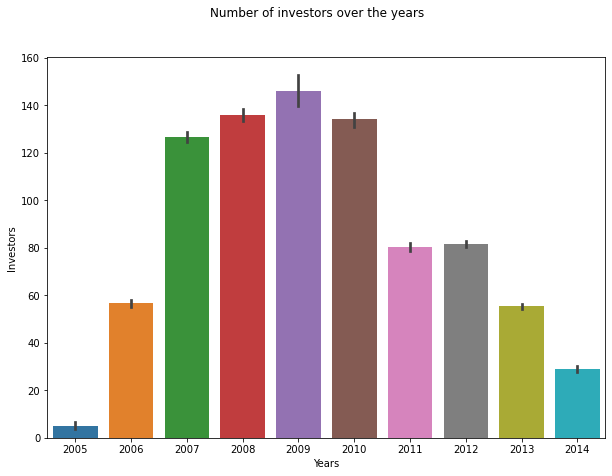

In [27]:
#plot to show relationship between investors and the years
plt.figure(figsize=[10,7])
sb.barplot(y='Investors', x='Year',  data=d2)
xl_yl_t('Years','Investors','Number of investors over the years')

We can see that the year 2009 had the most number of loan investors

Now let us try to find whether if the employment status of a person will affect the month that they apply for loans

From the above heatmap, we can see that Employed people generlly apply for loans throughout the year and does not affect loan applications

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

Well some features depend on each other while others do not, I realized here that the employment status of people did not have any effect on specific months that they should apply for loans

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

I got interesting insights on the Investors feature as I found out that investors generally prefer to invest to loans during the middle of the year

## Multivariate Exploration
Now since we found out that employed people generally applied for larger amounts of loans, now let us look on how employment status affects the loan amount over the years so far per the dataset

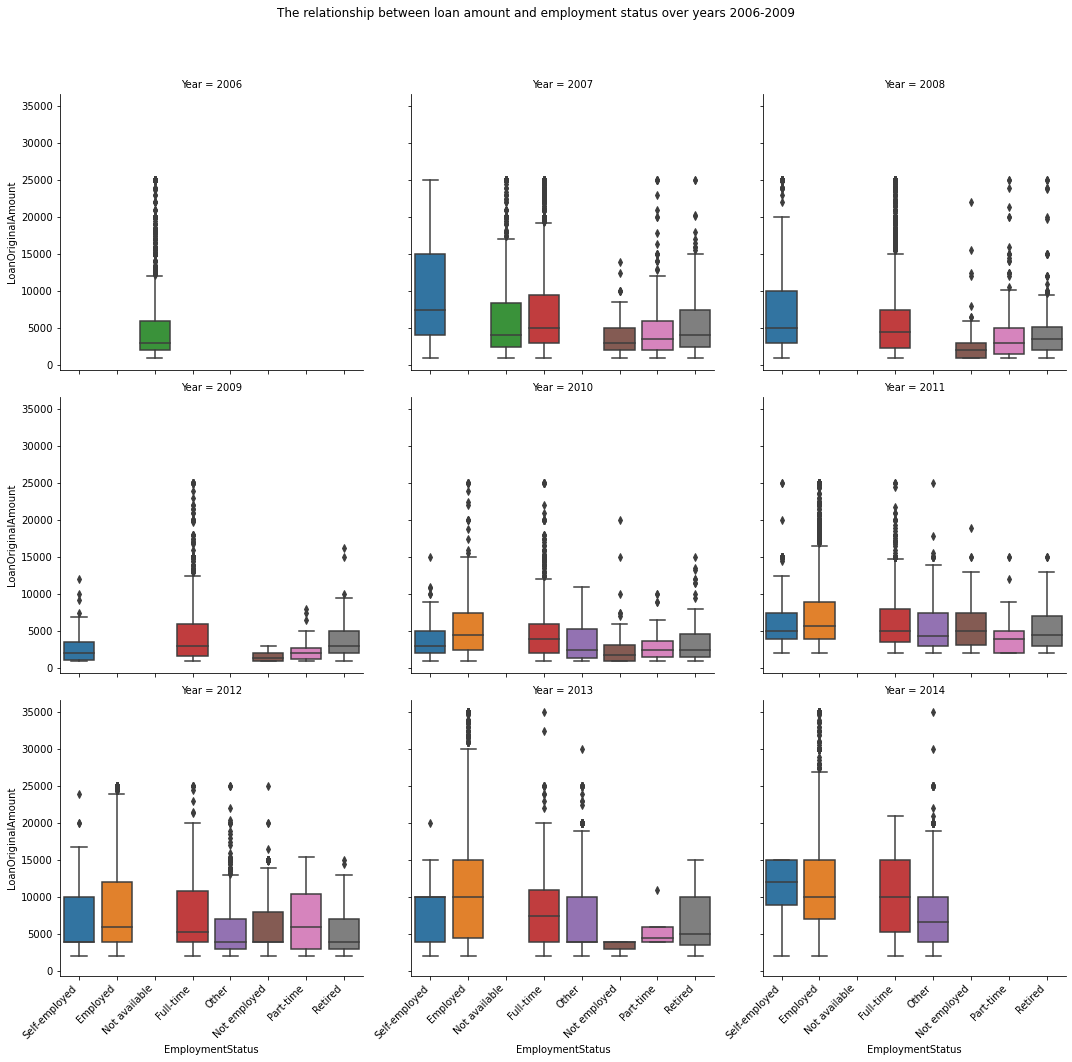

In [28]:
#Now plotting the relationship between loan amount and employment status over 2006-2009 

m2 = sb.catplot(
     x ='EmploymentStatus',  
     y ='LoanOriginalAmount',
     data = d2,
     kind ='box',
     col ='Year',
     col_order = [2006,2007,2008,2009,2010,2011,2012,2013,2014],
     col_wrap = 3,
     height = 5
)
m2.set_xticklabels(rotation=45, horizontalalignment='right')
plt.suptitle('The relationship between loan amount and employment status over years 2006-2009')
plt.tight_layout()
plt.subplots_adjust(top=0.90)

**The plot for year 2005 was removed since there was no any data to plot**

From the plots above, we can generate some valuable insights:
* Self employed applicants appear in all the years, this tells me that possibly in each year there is a very high possibility that there will be a loan applicant that is self employed

* From the year 2010 where we see data for employed people suggests that employed people are generally more likely to have the largest amount of loans

* In the year 2006, the only data present is for "Not available" this could be interpreted in a way that maybe Prosper did not heavily restrict people to put their employment status, as we can see that from the next year onwards to 2014 people who applied for loans stated their employment status showing that they started to take that matter seriously


We can also try to look at how the income ranges of the loan applicants affect the loan amount throughout the years

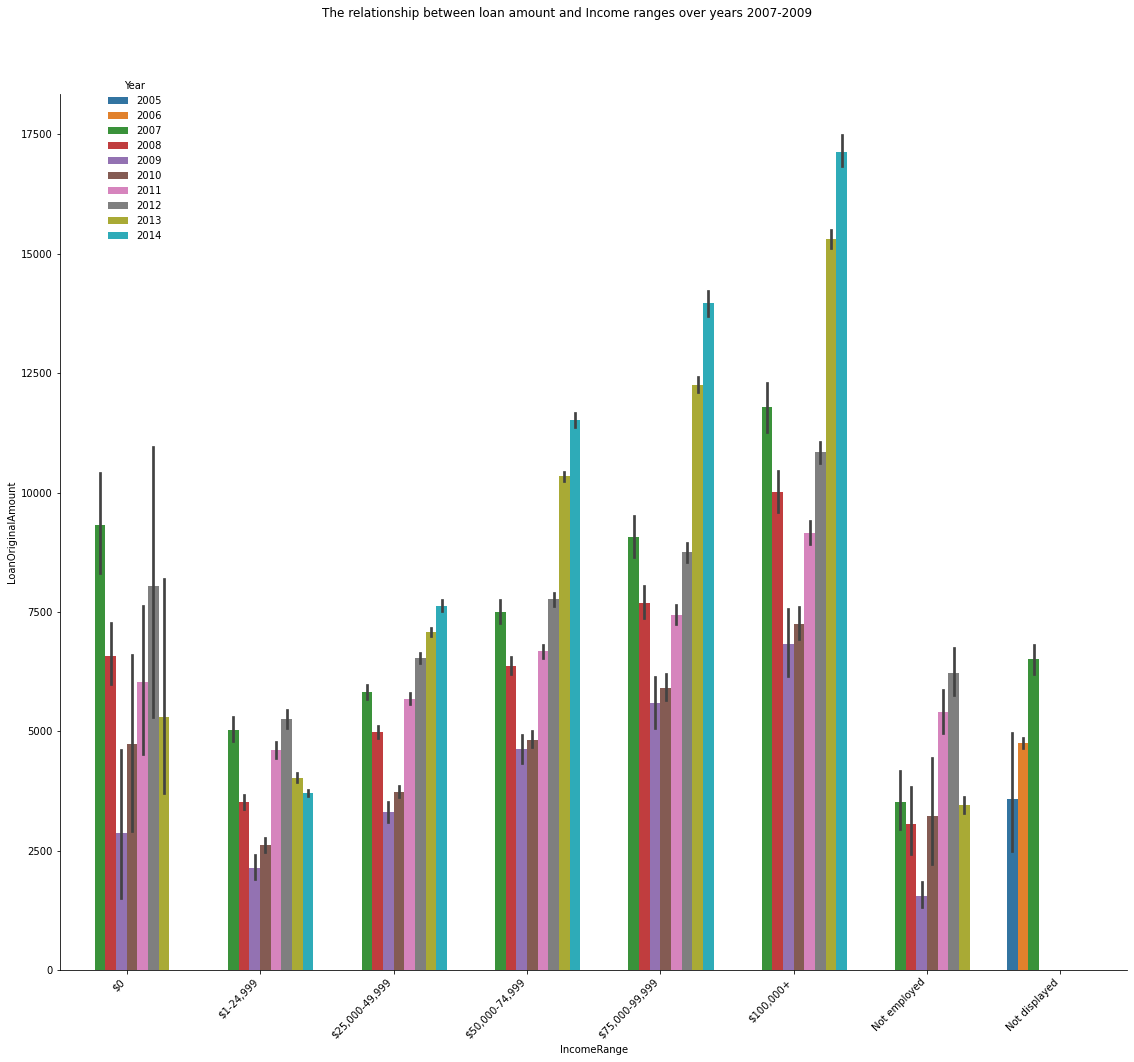

In [29]:
m3 = sb.catplot(
     x ='IncomeRange',  
     y ='LoanOriginalAmount',
     data = d2,
     kind ='bar',
     hue ='Year',
     hue_order = [2005,2006,2007,2008,2009,2010,2011,2012,2013,2014],
     order =["$0" ,"$1-24,999", "$25,000-49,999", "$50,000-74,999", "$75,000-99,999", "$100,000+","Not employed","Not displayed"],
     height =15
)
m3.set_xticklabels(rotation=45, horizontalalignment='right')
plt.suptitle('The relationship between loan amount and Income ranges over years 2007-2009')
plt.tight_layout()
plt.subplots_adjust(top=0.90)
sb.move_legend(m3, "upper left", bbox_to_anchor=(.09, .92), title='Year')


From the above plot I can generally say that there is a visible downtrend from the years 2007-2009 where 2009 exhibiting the lowest original loan amounts applied for indicating that there was some kind of a financial matter in the period 2008-2009 that caused this
 

Now, does the loan amount vary across loan applicants of different employment statuses in the different states that the loan borrowers come from? We will answer this by looking at the distribution of the loan amounts in various states across loan applicants of different employment statuses

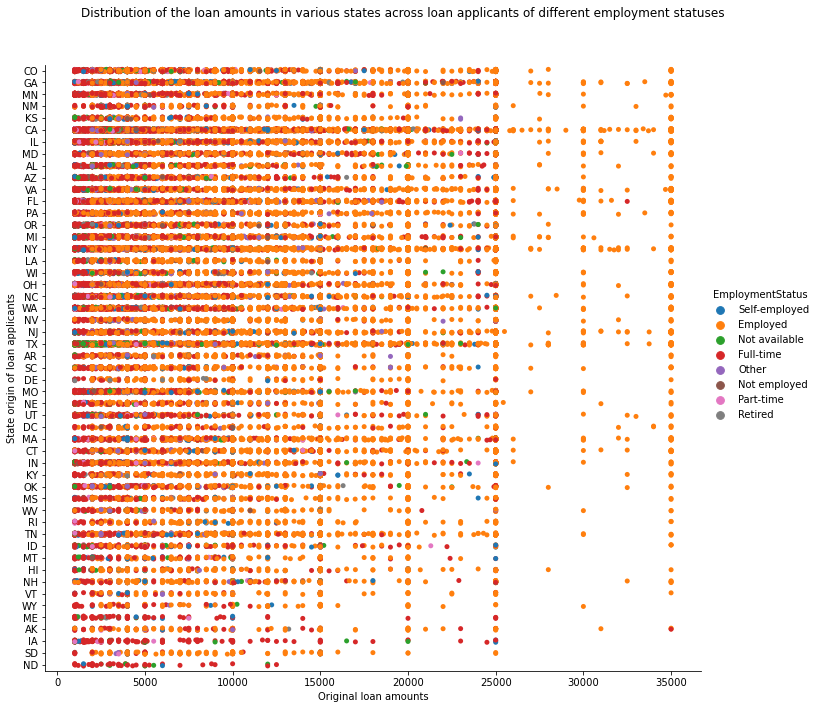

In [30]:
sb.catplot(x = 'LoanOriginalAmount', y = 'BorrowerState', hue = 'EmploymentStatus', data = df_loan,height=10);
xl_yl_t('Original loan amounts','State origin of loan applicants','Distribution of the loan amounts in various states across loan applicants of different employment statuses')
plt.subplots_adjust(top=0.90)

From the visualization above we can clearly see that generally across most states,the employed loan applicants apply for the largest number of loans than any other employment status category.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

When looking at the relationship between loan amounts  and employment status over the years, you can generally see that regardless that most loan applicants and the applicants who loaned the largest amount were the employed ones, there is only data for these employed people in 5 out of 9 years showing that this group of people has been very active in loan applications.

### Were there any interesting or surprising interactions between features?

There was no data for the year 2005 about the loan amounts across the people of different employment statuses from the dataset
